In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_suja_completa=pd.read_csv("speeddating.csv")


data_suja_limpo=data_suja_completa[data_suja_completa!= "?" ]
data_suja_limpo.dropna(inplace=True)
data=data_suja_limpo


Text(0.5, 1.0, 'Quantidade de homens e mulheres')

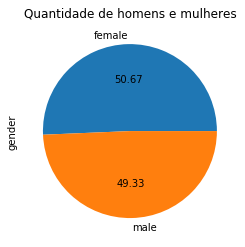

In [23]:
genero=data.gender.value_counts()
genero.plot(kind='pie', autopct="%.2f",legend=False)
plt.title("Quantidade de homens e mulheres")

count    1048.000000
mean       25.005725
std         3.270365
min        18.000000
25%        22.000000
50%        25.000000
75%        27.000000
max        35.000000
Name: age, dtype: float64

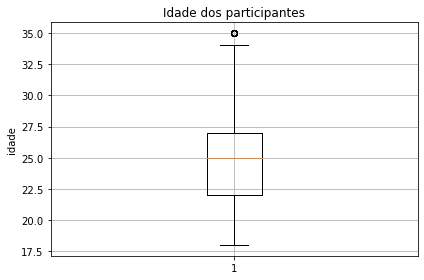

In [29]:
idade=data.age.astype(int)
plt.boxplot(idade)
plt.title('Idade dos participantes')
plt.ylabel('idade')
plt.grid(which='both')
plt.tight_layout()

idade.describe()


Text(0.5, 1.0, 'Quantidade de Matches')

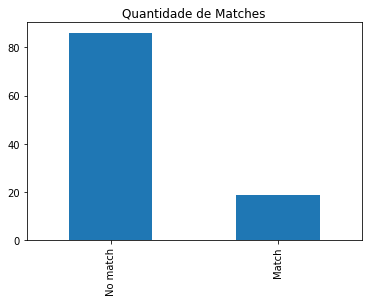

In [24]:
match = data.match.value_counts()
match_rate = match*0.1
match_rate = match_rate.rename(index={0: 'No match',1: 'Match'})

match_rate.plot.bar()
plt.title("Quantidade de Matches")

Text(0.5, 1.0, 'Porcentagem de Match por gênero')

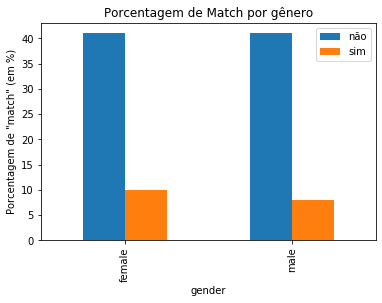

In [25]:
match=pd.crosstab(data.gender, data.match)
match = (match/match.sum().sum()*100).round(decimals=0)
match.plot(kind= "bar")
plt.ylabel('Porcentagem de "match" (em %)')
plt.legend(["não", "sim"])
plt.title("Porcentagem de Match por gênero")

In [30]:
match

match,0,1
gender,,
female,41.0,10.0
male,41.0,8.0


<BarContainer object of 1048 artists>

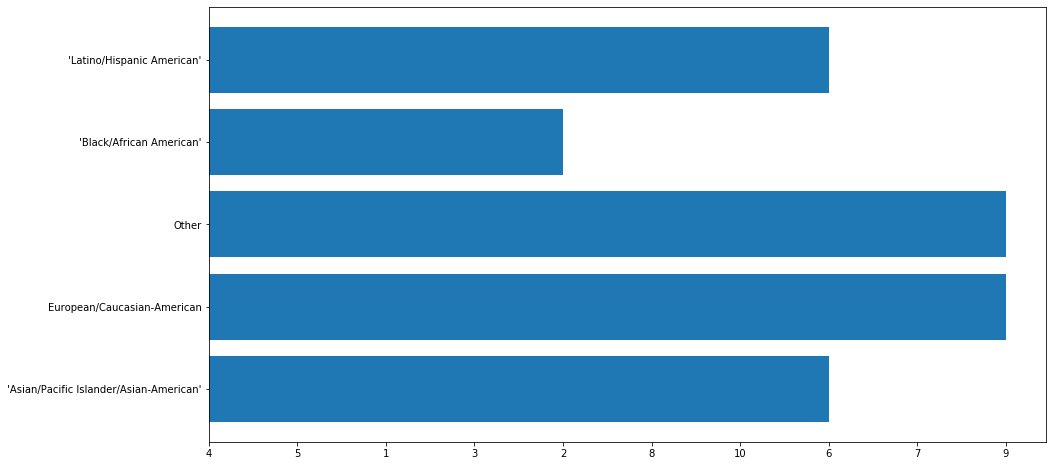

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh( data['race'], data['importance_same_religion'])

## “O que esperamos do outro” VS “O que o outro espera de você”

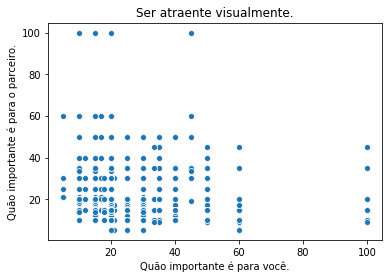

In [10]:
partnere_attractive = data.pref_o_attractive.astype(float)
you_attractive = data.attractive_important.astype(float)

sns.scatterplot(you_attractive,partnere_attractive)
plt.title('Ser atraente visualmente.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

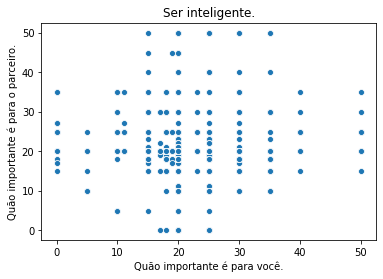

In [11]:
partnere_intelligence = data.pref_o_intelligence.astype(float)
you_intelligence = data.intellicence_important.astype(float)

sns.scatterplot(you_intelligence,partnere_intelligence)
plt.title('Ser inteligente.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

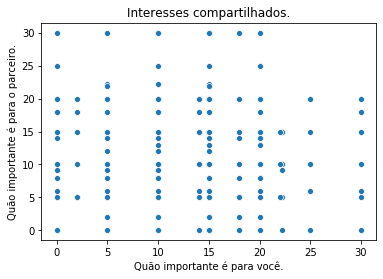

In [12]:
partnere_interes = data.pref_o_shared_interests.astype(float)
you_interes = data.shared_interests_important.astype(float)

sns.scatterplot(you_interes,partnere_interes)
plt.title('Interesses compartilhados.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

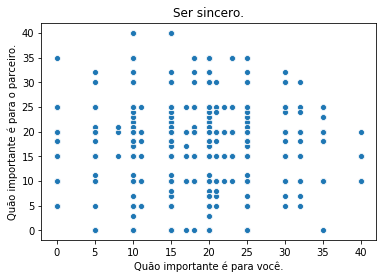

In [13]:
partnere_sincere = data.pref_o_sincere.astype(float)
you_sincere = data.sincere_important.astype(float)

sns.scatterplot(you_sincere,partnere_sincere)
plt.title('Ser sincero.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

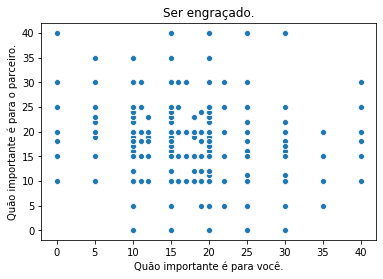

In [14]:
partnere_funny = data.pref_o_funny.astype(float)
you_funny = data.funny_important.astype(float)

sns.scatterplot(you_funny,partnere_funny)
plt.title('Ser engraçado.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

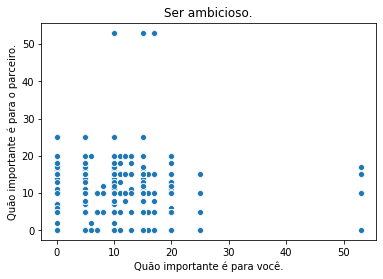

In [15]:
partnere_ambitious = data.pref_o_ambitious.astype(float)
you_ambitious = data.ambtition_important.astype(float)

sns.scatterplot(you_ambitious,partnere_ambitious)
plt.title('Ser ambicioso.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

## Match por Interesses

Depois de analisar cada característica separadamente, iremos verificar a relação de algumas variáveis com o match. Dessa forma, começamos por analisar a porcentagem de dar match com a nota atribuída à característica "clubbing".

Dessa forma, é possível perceber que aqueles que atribuiram 7 para a varaável, obtiveram uma ligeira vantagem em relação aos matches. Em contrapartida, quem não deu importância alguma, não obteve nenhum match.

Para a categoria filmes, aqueles que possuem mais interesse ( notas entre 8 e 10) são os que têm mais chance de dar match com outro  candidato. Porém, essa faixa de interesse também representa aqueles que apresentam a maior porcentagem de não match, dentre o espaço amostral. Isso significa que uma maior parcela dos candidatos votou nessas notas, e, por isso, ambas as porcentagens foram mais altas.

In [226]:
shopping=pd.crosstab(data.shopping, data.match)
shopping

match,0,1
shopping,,
1,32,4
10,80,23
2,117,32
3,57,13
4,102,14
5,165,30
6,104,25
7,68,7
8,82,29


In [227]:
total=[36, 103, 149, 70, 116, 195, 129, 75, 111,64]
valor_nao_match=[]
valor_match=[]
a=0
for i in shopping[0]:
    valor_nao_match.append(i/total[a]) 
    a+=1
valor_nao_match

b=0
for i in shopping[1]:
    valor_match.append(i/total[b]) 
    b+=1

valor_nao_match

[0.8888888888888888,
 0.7766990291262136,
 0.785234899328859,
 0.8142857142857143,
 0.8793103448275862,
 0.8461538461538461,
 0.8062015503875969,
 0.9066666666666666,
 0.7387387387387387,
 0.859375]

/Users/beatrizrianhobernadinho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


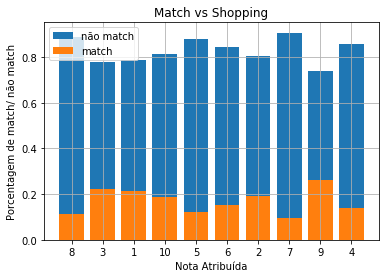

In [231]:
shopping=data.loc[data.match==1]
shopping.shopping
v=[]
shopping.shopping
for i in shopping.shopping: 
    if i not in v:
        v.append(i)


shopping2=data.loc[data.match==0]
shopping2.shopping
v2=[]
for i in shopping2.shopping: 
    if i not in v2:
        v2.append(i)

plt.bar(v2, valor_nao_match)
plt.subplot(111,)
plt.bar(v, valor_match)
plt.ylabel("Porcentagem de match/ não match")
plt.xlabel("Nota Atribuída")
plt.legend(["não match", "match"], loc='best')
plt.title("Match vs Shopping")
plt.grid()

In [230]:
exercise=pd.crosstab(data.exercise, data.match)
exercise

match,0,1
exercise,,
1,8,15
10,59,2
2,90,13
3,87,13
4,66,16
5,77,22
6,117,17
7,144,31
8,128,37


In [219]:
total=[23, 61, 103, 100, 82, 99, 134, 175, 165,106]
valor_nao_match=[]
valor_match=[]
a=0
for i in exercise[0]:
    valor_nao_match.append(i/total[a]) 
    a+=1
valor_nao_match

b=0
for i in exercise[1]:
    valor_match.append(i/total[b]) 
    b+=1

valor_match

[0.6521739130434783,
 0.03278688524590164,
 0.1262135922330097,
 0.13,
 0.1951219512195122,
 0.2222222222222222,
 0.12686567164179105,
 0.17714285714285713,
 0.22424242424242424,
 0.18867924528301888]

/Users/beatrizrianhobernadinho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


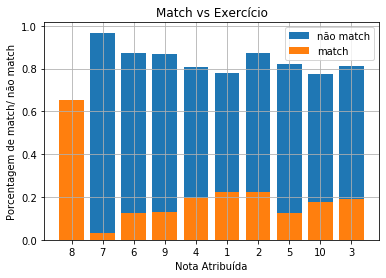

In [220]:
exercicio=data.loc[data.match==1]
exercicio.exercise
v=[]
for i in exercicio.exercise: 
    if i not in v:
        v.append(i)


exercicio2=data.loc[data.match==0]
exercicio2.exercise
v2=[]
for i in exercicio2.exercise: 
    if i not in v2:
        v2.append(i)

plt.bar(v2, valor_nao_match)
plt.subplot(111,)
plt.bar(v, valor_match)
plt.ylabel("Porcentagem de match/ não match")
plt.xlabel("Nota Atribuída")
plt.legend(["não match", "match"])
plt.title("Match vs Exercício")
plt.grid()

In [221]:
filmes=pd.crosstab(data.movies, data.match)
filmes


match,0,1
movies,,
10,183,61
3,12,4
4,14,1
5,17,6
6,87,14
7,180,30
8,203,38
9,166,32


In [222]:
total=[244, 16, 15, 23, 101, 210, 241, 198]
valor_nao_match=[]
valor_match=[]
a=0
for i in filmes[0]:
    valor_nao_match.append(i/total[a]) 
    a+=1
valor_nao_match

b=0
for i in filmes[1]:
    valor_match.append(i/total[b]) 
    b+=1

valor_match

[0.25,
 0.25,
 0.06666666666666667,
 0.2608695652173913,
 0.13861386138613863,
 0.14285714285714285,
 0.15767634854771784,
 0.16161616161616163]

/Users/beatrizrianhobernadinho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


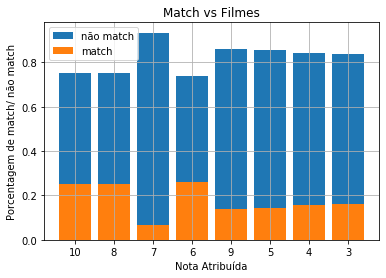

In [223]:
filmes=data.loc[data.match==1]
filmes.movies
v=[]
for i in filmes.movies: 
    if i not in v:
        v.append(i)


filmes2=data.loc[data.match==0]
filmes2.movies
v2=[]
for i in filmes2.movies: 
    if i not in v2:
        v2.append(i)

plt.bar(v2, valor_nao_match)
plt.subplot(111,)
plt.bar(v, valor_match)
plt.ylabel("Porcentagem de match/ não match")
plt.xlabel("Nota Atribuída")
plt.legend(["não match", "match"])
plt.title("Match vs Filmes")
plt.grid()

## Observando a probabilidade de dar match dado as faixas de diferenças entre a resposta do casal

In [22]:

for v in ['d_pref_o_funny' ,'d_pref_o_ambitious',
        'd_pref_o_shared_interests','d_pref_o_sincere', 'd_pref_o_intelligence',
        'd_pref_o_attractive',"d_age",'d_importance_same_race',
        'd_importance_same_religion',"samerace", 'd_attractive_o',
        'd_sinsere_o' ,'d_intelligence_o' ,'d_funny_o', 'd_ambitous_o',
        'd_shared_interests_o', 'd_attractive_important' ,'d_sincere_important' ,'d_intellicence_important',
        'd_funny_important', 'd_ambtition_important',
        'd_shared_interests_important', 'd_attractive', 'd_sincere',
        'd_intelligence', 'd_funny' ,'d_ambition', 'd_attractive_partner' ,'d_sincere_partner',
        'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner',
        'd_shared_interests_partner', 'd_sports', 'd_tvsports',
        'd_exercise' ,'d_dining' ,'d_museums', 'd_art' ,'d_hiking', 'd_gaming',
        'd_clubbing' ,'d_reading', 'd_tv' ,'d_theater' ,'d_movies' ,'d_concerts',
        'd_music', 'd_shopping', 'd_yoga', 'd_interests_correlate',
        'd_like', 'met']:
    x = pd.crosstab(data['match'], data[v])
    print('='*50)
    print((x.loc[1,:] / x.sum()).sort_index())

d_pref_o_funny
[0-15]      0.160164
[16-20]     0.164345
[21-100]    0.242574
dtype: float64
d_pref_o_ambitious
[0-15]      0.178733
[16-20]     0.181208
[21-100]    0.066667
dtype: float64
d_pref_o_shared_interests
[0-15]      0.170872
[16-20]     0.198675
[21-100]    0.280000
dtype: float64
d_pref_o_sincere
[0-15]      0.209544
[16-20]     0.126685
[21-100]    0.194872
dtype: float64
d_pref_o_intelligence
[0-15]      0.182540
[16-20]     0.165385
[21-100]    0.191542
dtype: float64
d_pref_o_attractive
[0-15]      0.202658
[16-20]     0.176471
[21-100]    0.160377
dtype: float64
d_age
0     0.263636
1     0.175214
2     0.160622
3     0.216783
4     0.186916
5     0.089888
6     0.153846
7     0.160714
8     0.357143
9     0.047619
10    0.000000
11    0.000000
13    0.000000
14    1.000000
dtype: float64
d_importance_same_race
[0-1]     0.245562
[2-5]     0.170029
[6-10]    0.121212
dtype: float64
d_importance_same_religion
[0-1]     0.252252
[2-5]     0.146409
[6-10]    0.138810
dty

Os gráficos plotados são porcentagens relativas a cada nota atribuída pela categoria, pois se fosse utilizada a porcentagem total, as notas que foram mais atribuídas seriam as mais propensas a fornecer a maior porcentagem de match e não match. Desse modo, é  possível perceber que aqueles que apresentam um maior interesse por festejar, fazer compras e exercícios, também possui uma maior porcentagem de Match. Porém, aqueles que demonstram um interesse médio para alto em filmes, são aqueles que vão conseguir o maior número de match, e, por sua vez, aqueles que apresentam um baixo interesse em arte são os que também recebem mais match.